In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import arange
from numpy import printoptions
from pandas import read_csv
from pandas import set_option
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
colNames=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv('housing (task4).csv',skipinitialspace=True,delim_whitespace=True,names=colNames)
df=df.dropna()


In [75]:
array=df.values
X=array[:,0:13]
Y=array[:,13]

In [76]:
#Rescalling Data
scalar=MinMaxScaler(feature_range=(0,1))
rX=scalar.fit_transform(X)
np.set_printoptions(precision=4)
print(rX[0:1,:])


[[0.     0.18   0.0678 0.     0.3148 0.5775 0.6416 0.2692 0.     0.208
  0.2872 1.     0.0897]]


In [77]:
validation_size=0.33
seed=7
X_train,X_validation,Y_train,Y_validation=train_test_split(rX,Y,test_size=validation_size,random_state=seed)

In [78]:
num_folds=3
seed=1
scoring='r2'

In [79]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
results=[]
names=[]
for name, model in models:  
  kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

LR: 0.710669 (0.050219)
LASSO: 0.229649 (0.073271)
EN: 0.126835 (0.040412)
KNN: 0.605440 (0.070115)
CART: 0.715362 (0.028046)
SVR: 0.472674 (0.098830)


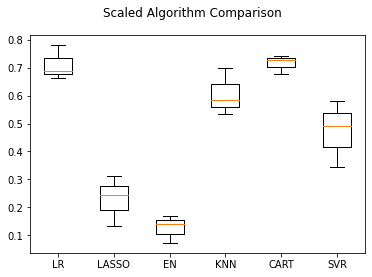

In [80]:
fig=pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax=fig.add_subplot(111) #(rows columns n) n<=rows*columns
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [81]:
model=DecisionTreeRegressor(max_depth=30)
model.fit(X_train, Y_train)
predictions=model.predict(X_validation)
print(r2_score(Y_validation,predictions))

0.6964958987944256


In [85]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=GradientBoostingRegressor(random_state=seed,n_estimators=100)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))


0.869829076477171
